In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
import seaborn as sns

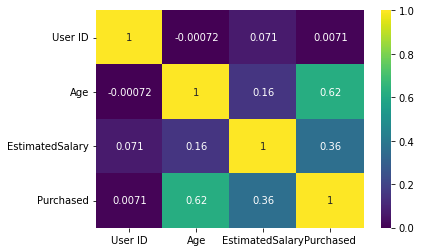

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
X = df.iloc[:,2:4].values

In [ ]:
Y = df.iloc[:,4].values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
Y.shape

(400,)

In [ ]:
from sklearn.preprocessing import StandardScaler

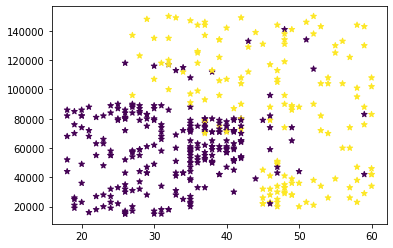

In [ ]:
plt.scatter(X[:,0:1],X[:,1:2],c=Y,marker='*')

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.4)

In [ ]:
x_test.shape

(160, 2)

In [ ]:
x_cv,x_t1,y_cv,y_t1=train_test_split(x_test,y_test,test_size=0.5)

In [ ]:
 x_cv.shape

(80, 2)

In [ ]:
y_t1.shape

(80,)

In [ ]:
Sc = StandardScaler()

In [ ]:
x_train = Sc.fit_transform(x_train)

In [ ]:
x_train

array([[-1.71322801e+00, -6.32641920e-01],
       [ 1.56229696e+00,  1.22783775e+00],
       [-1.23153316e+00,  6.60233780e-01],
       [-5.57160374e-01,  2.55224700e+00],
       [ 4.06229322e-01,  3.44898243e-01],
       [-6.53499344e-01,  1.54317328e+00],
       [-9.42516253e-01, -7.90309688e-01],
       [-1.03885522e+00,  4.71032458e-01],
       [ 2.13551383e-01, -3.80373491e-01],
       [ 3.09890352e-01,  6.10962602e-02],
       [ 3.09890352e-01, -5.69574813e-01],
       [ 1.17212413e-01,  2.04771014e+00],
       [ 7.91585200e-01,  8.49435102e-01],
       [-7.49838314e-01,  5.65633119e-01],
       [-1.52055007e+00, -1.91172169e-01],
       [ 1.08060211e+00, -1.04257812e+00],
       [ 2.08734434e-02, -5.69574813e-01],
       [ 8.87924170e-01, -1.54711498e+00],
       [-6.53499344e-01,  2.18764028e-01],
       [-8.46177283e-01,  4.39498904e-01],
       [ 1.17212413e-01,  2.04771014e+00],
       [-6.53499344e-01, -1.10564522e+00],
       [ 2.14033078e+00, -7.27242581e-01],
       [ 4.

In [ ]:
x_cv= Sc.fit_transform(x_cv)

In [ ]:
x_t1=Sc.fit_transform(x_t1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier= SVC(kernel='linear',random_state=0)

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pre= classifier.predict(x_cv)

In [ ]:
y_pre

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_cv

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_cv,y_pre)

array([[53,  4],
       [ 7, 16]])

In [ ]:
accuracy_score(y_pre,y_cv)

0.8625

In [ ]:
poly_classifier= SVC(kernel='poly',random_state=45)
poly_classifier.fit(x_train,y_train)


SVC(kernel='poly', random_state=45)

In [ ]:
y_pred_1= poly_classifier.predict(x_cv)
confusion_matrix(y_cv,y_pred_1)
accuracy_score(y_pred_1,y_cv)



0.8

In [ ]:
rbf_classifier= SVC(kernel='rbf', gamma = 2,random_state=45)
rbf_classifier.fit(x_train,y_train)
y_pred= rbf_classifier.predict(x_cv)
print(confusion_matrix(y_cv,y_pred_1))
print(accuracy_score(y_pred,y_cv))

[[53  4]
 [12 11]]
0.85
